In [5]:
import csv
import pandas as pd
from collections import defaultdict
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
plt.rcParams['figure.dpi'] = 360

<div style="text-align:center; display: flex; justify-content: center;">
  <table>
    <tr>
      <th>Rosette number</th>
      <th>Nodes</th>
      <th>Edges</th>
    </tr>
    <tr>
      <td>3</td>
      <td>11187</td>
      <td>7644</td>
    </tr>
    <tr>
      <td>6</td>
      <td>9588</td>
      <td>5275</td>
    </tr>
    <tr>
      <td>7</td>
      <td>11687</td>
      <td>9376</td>
    </tr>
    <tr>
      <td>11</td>
      <td>13707</td>
      <td>13153</td>
    </tr>
    <tr>
      <td>12</td>
      <td>10642</td>
      <td>6906</td>
    </tr>
    <tr>
      <td>13</td>
      <td>13306</td>
      <td>14499</td>
    </tr>
    <tr>
      <td>14</td>
      <td>10736</td>
      <td>7705</td>
    </tr>
    <tr>
      <td>15</td>
      <td>10152</td>
      <td>8721</td>
    </tr>
    <tr>
      <td>18</td>
      <td>11151</td>
      <td>8097</td>
    </tr>
    <tr>
      <td>19</td>
      <td>10293</td>
      <td>6797</td>
    </tr>
  </table>
</div>


In [6]:
def graph_r(r):

    nodes = []
    edges = []
    edges_distances = []

    with open(f'./data/rosette{r}_nodes.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            if (row!=0):
                values = list(row.values())
                n = []
                n.append(float(values[0]))
                n.append(float(values[1]))
                n.extend(22.5-2.5*np.log10([float(n) for n in values[2:-1]]))
                n.append(np.log10(float(values[-1])))
                nodes.append(n)

    with open(f'./data/rosette{r}_edges.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            if (row!=0):
                edges_distances.append([float(n) for n in list(row.values())])
                edges.append([float(n) for n in list(row.values())][:2])

    return (nodes,edges,edges_distances)

In [8]:
rosettes = [3,6,7,11,12,13,14,15,18,19]

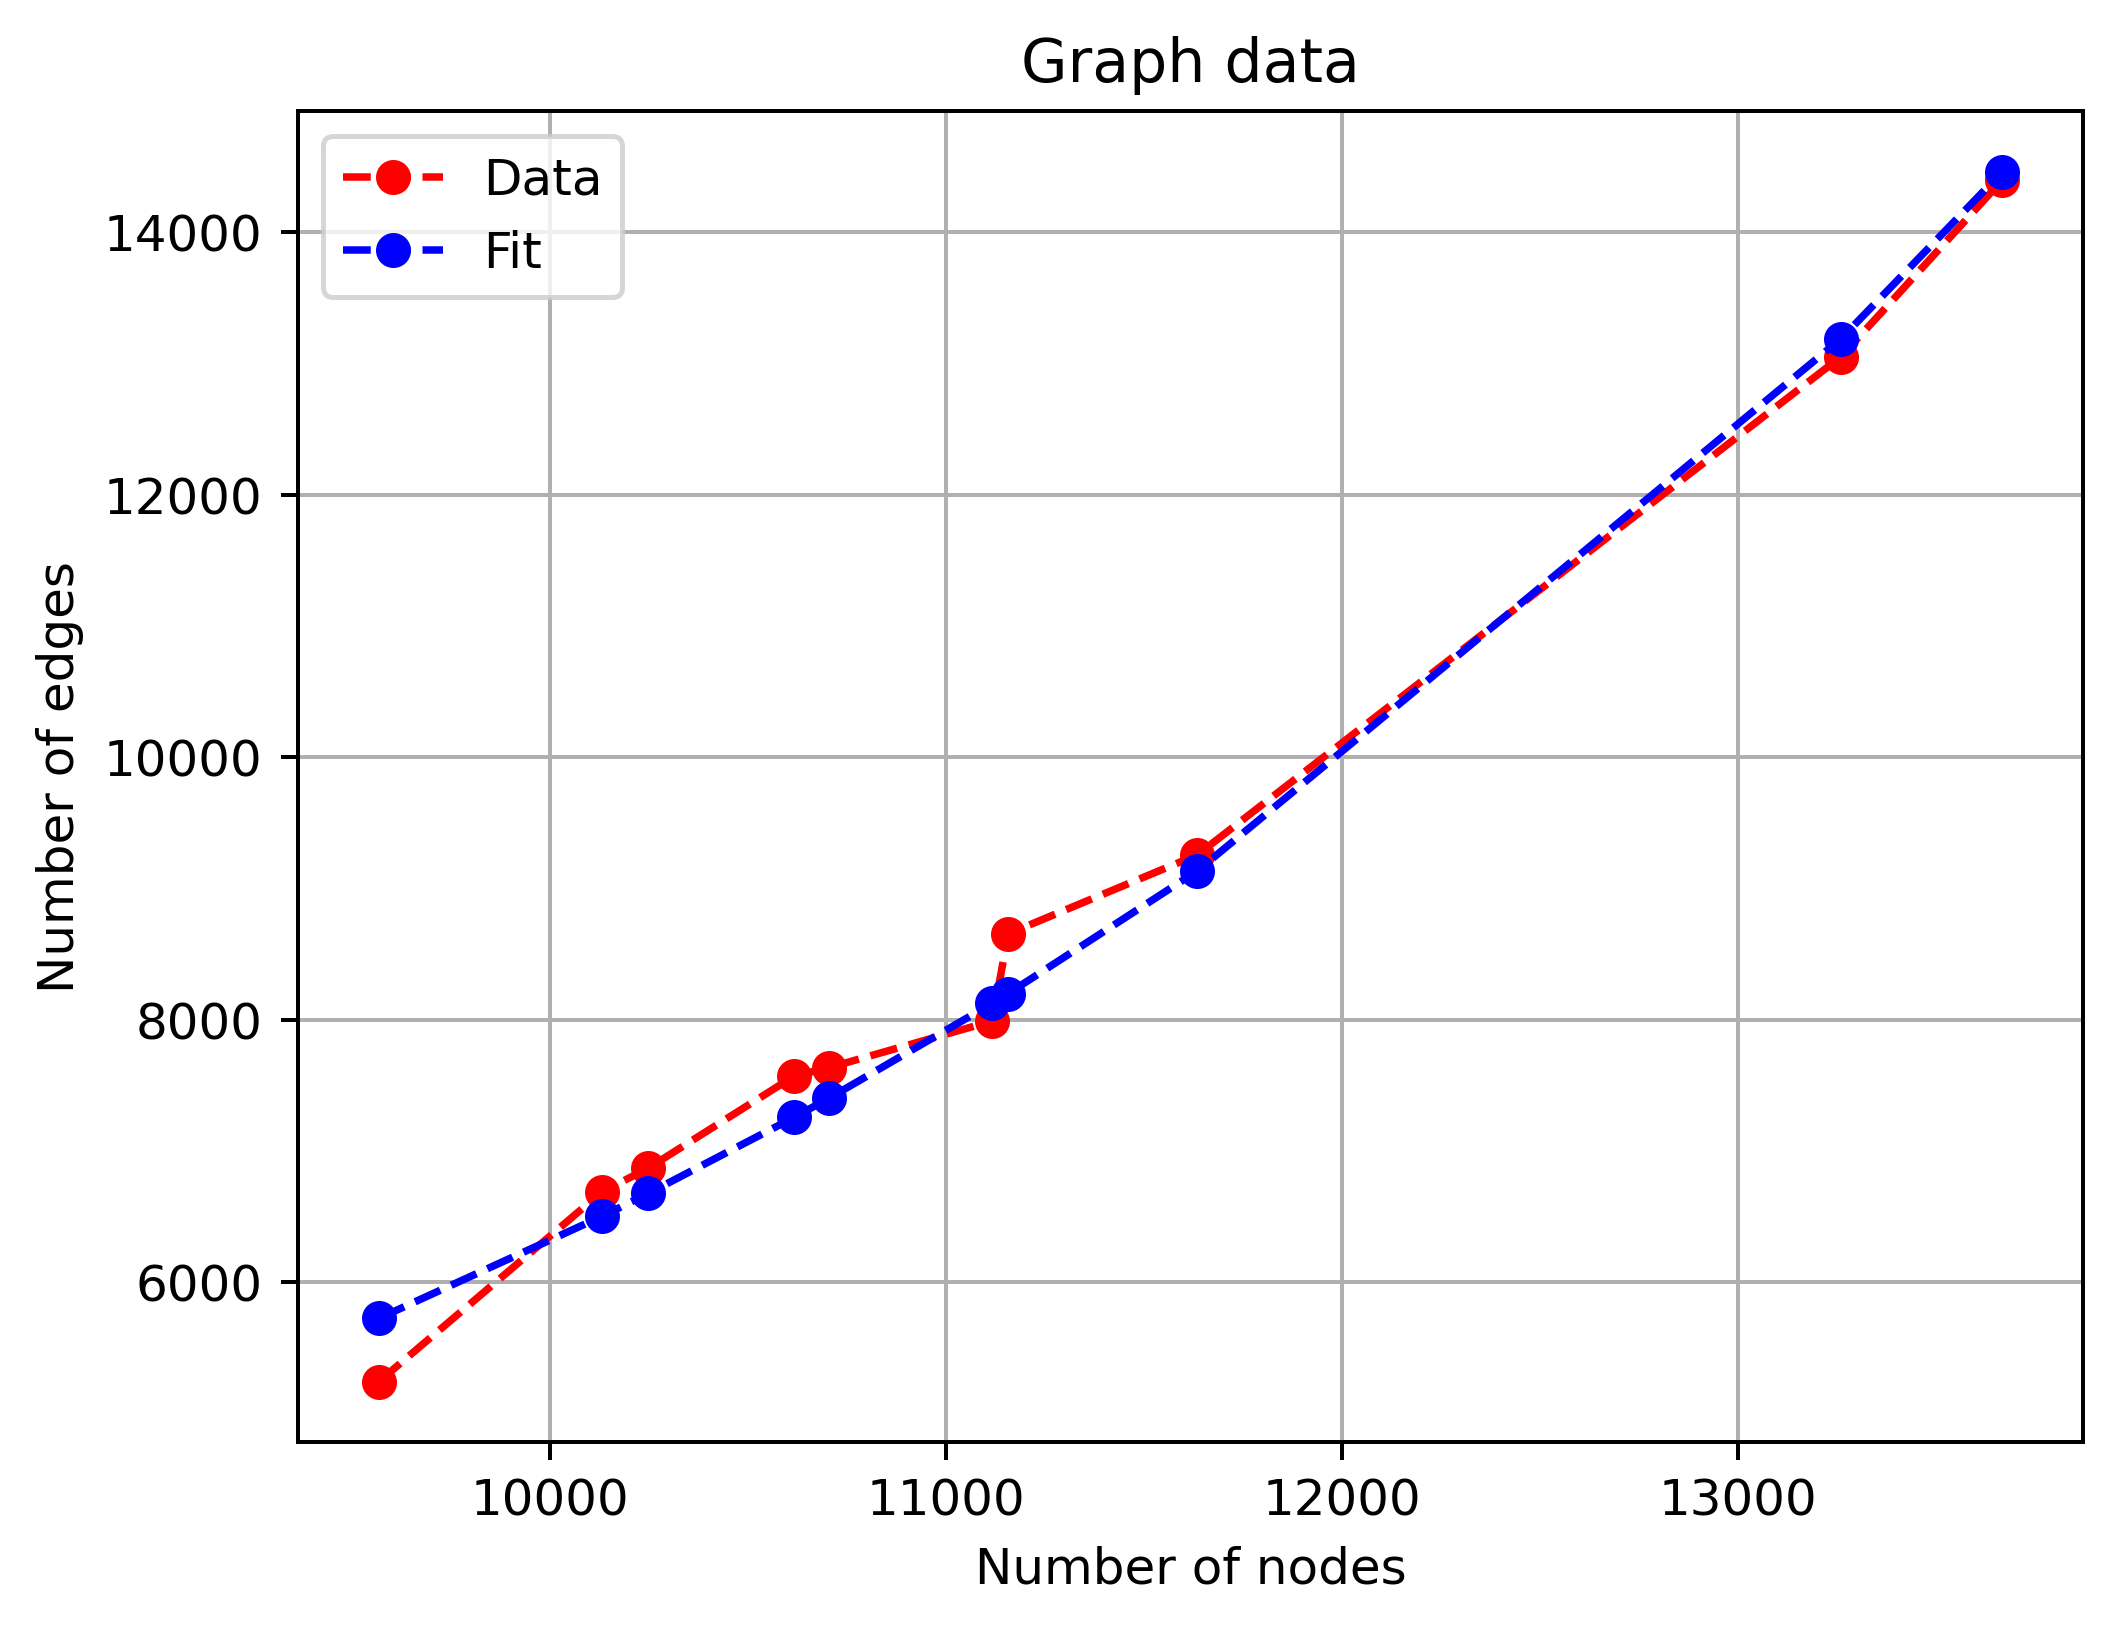

In [11]:
n = [len(nodes) for r in rosettes for nodes, _, _ in [graph_r(r)]]
ed = [len(edges) for r in rosettes for _, edges, _ in [graph_r(r)]]
n.sort()
ed.sort()

log_y = np.log(ed)
model = np.polyfit(nodes_g, log_y, 1)
a = np.exp(model[1])
b = model[0]
p = [a*np.exp(b*node) for node in n]

plt.plot(n, ed, marker='o', linestyle='--', color='r')
plt.plot(n, p, marker='o', linestyle='--', color='b')
plt.xlabel('Number of nodes')
plt.ylabel('Number of edges')
plt.title('Graph data')

plt.legend(['Data', 'Fit'])
plt.grid()

/var/folders/ls/yc9nb2gx14s6sstnjr_fcy5r0000gn/T/ipykernel_12273/3959600785.py:18: RuntimeWarning: divide by zero encountered in log10
  log_ed = np.log10(ed)


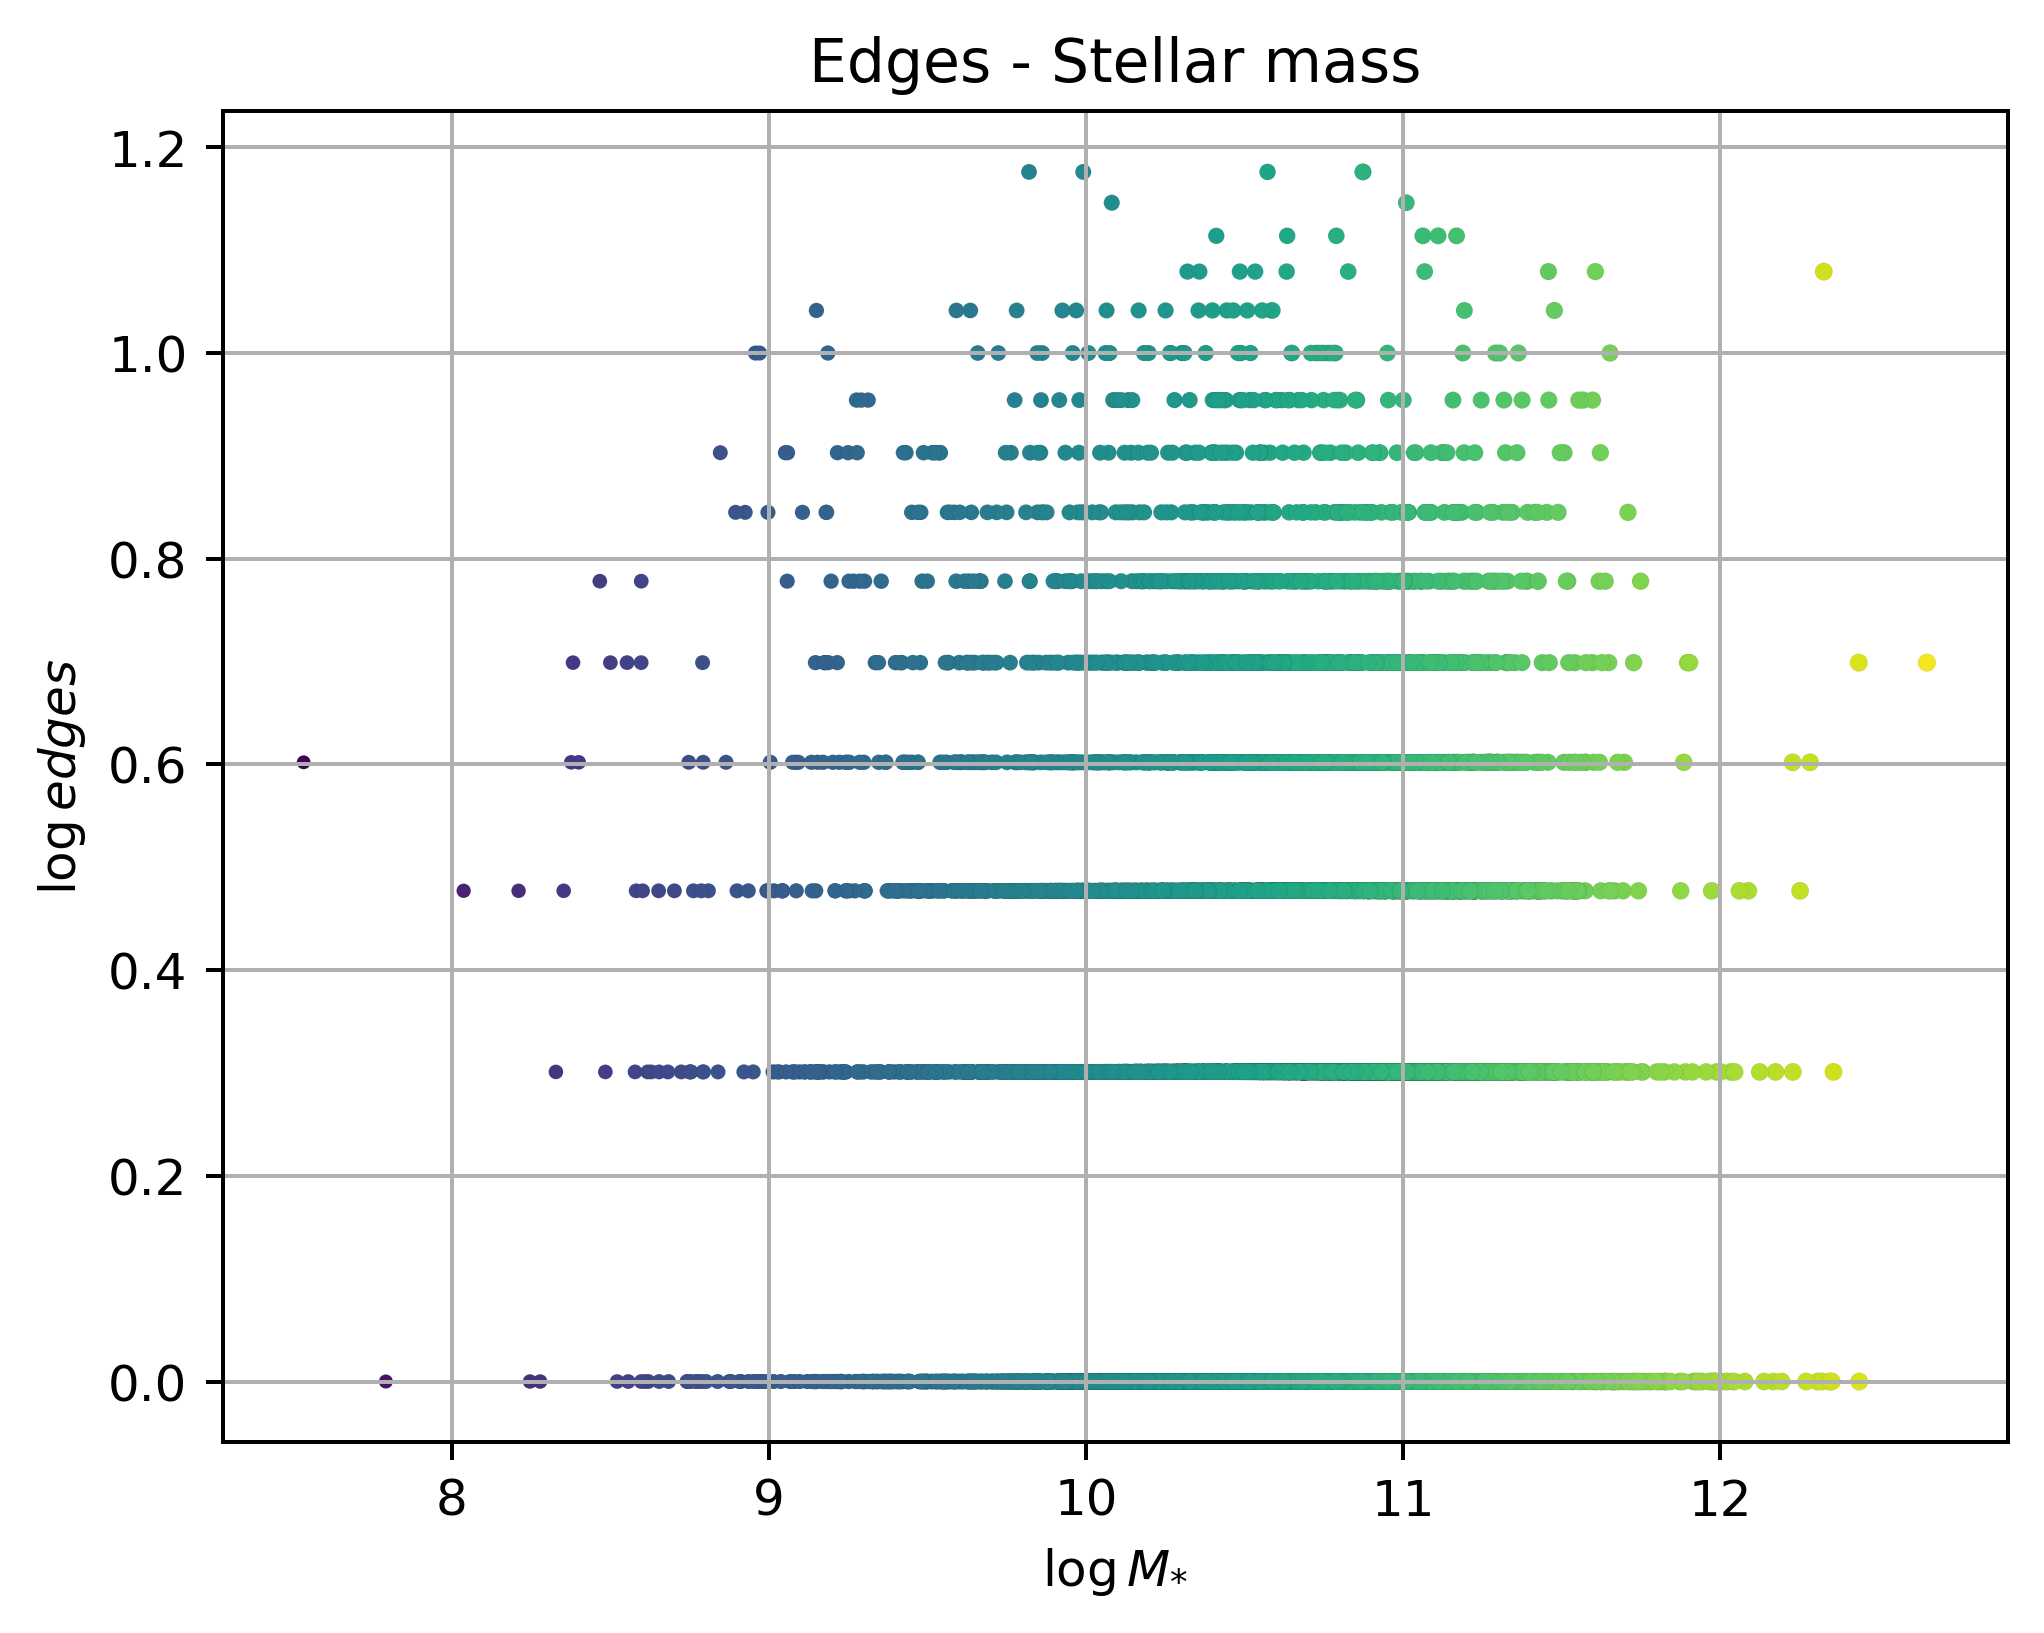

In [14]:
c = defaultdict(int)
for edge in edges:
    c[edge[0]] += 1
    c[edge[1]] += 1
m = [n[1] for n in nodes]
ed = [c[n[0]] for n in nodes]

fig = plt.figure()
ax = fig.add_subplot(111)

cmap = cm.viridis
n = (m - np.min(m)) / (np.max(m) - np.min(m))
min_norm = np.min(m)
max_norm = np.max(m)
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_norm, vmax=max_norm))
sm.set_array([])

log_ed = np.log10(ed)
ax.scatter(m, log_ed, c=cmap(n), s=m, edgecolors='black', linewidths=0.01)
ax.set_xlabel(r'$\log M_{*}$')
ax.set_ylabel(r'$\log edges$')
plt.grid()
plt.title('Edges - Stellar mass')
plt.show()

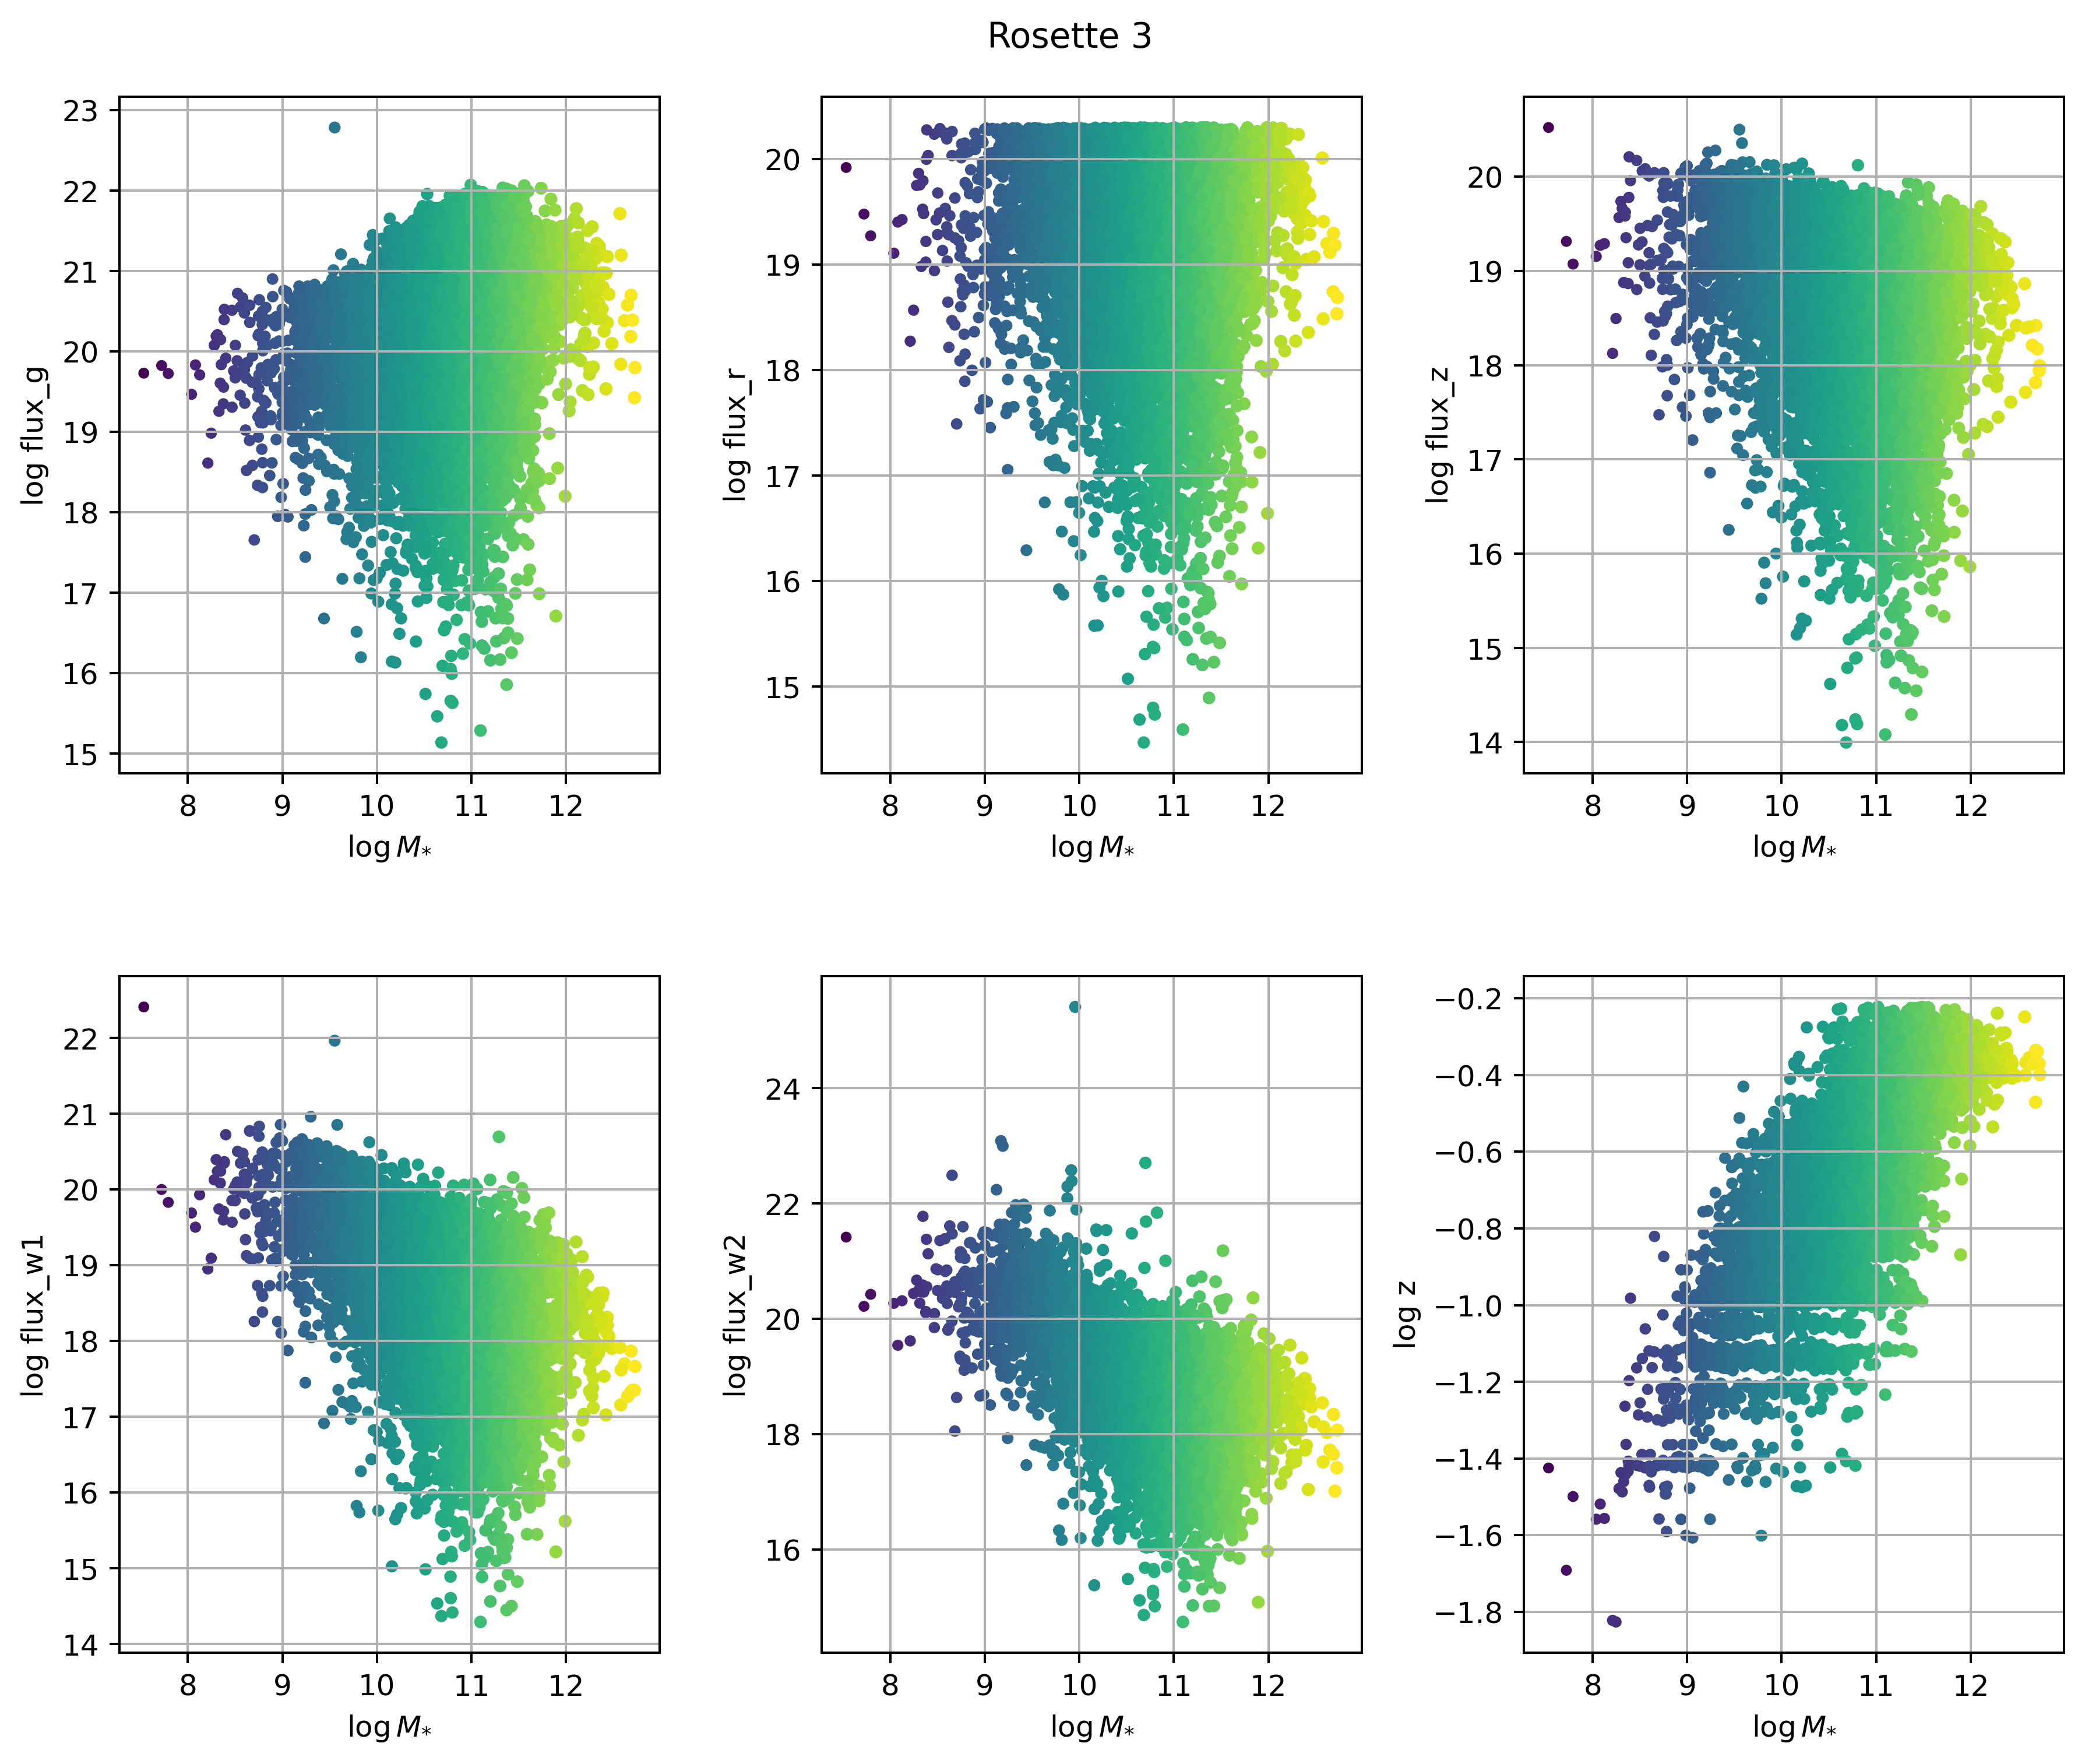

In [17]:
props = ['flux_g', 'flux_r', 'flux_z', 'flux_w1', 'flux_w2', 'z']
nodes, edges, _ = graph_r(rosettes[0])

m = [n[1] for n in nodes]
flux = np.array([n[2:] for n in nodes])

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
plt.tight_layout()
plt.suptitle(r'Rosette 3', y=1.02)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i in range(2):
    for j in range(3):
        axes[i, j].scatter(m, flux[:,i*3+j], c=cmap(n), s=m)
        axes[i, j].set_xlabel(r'$\log M_{*}$')
        axes[i, j].set_ylabel(f'log {props[i*3+j]}')
        axes[i, j].grid()

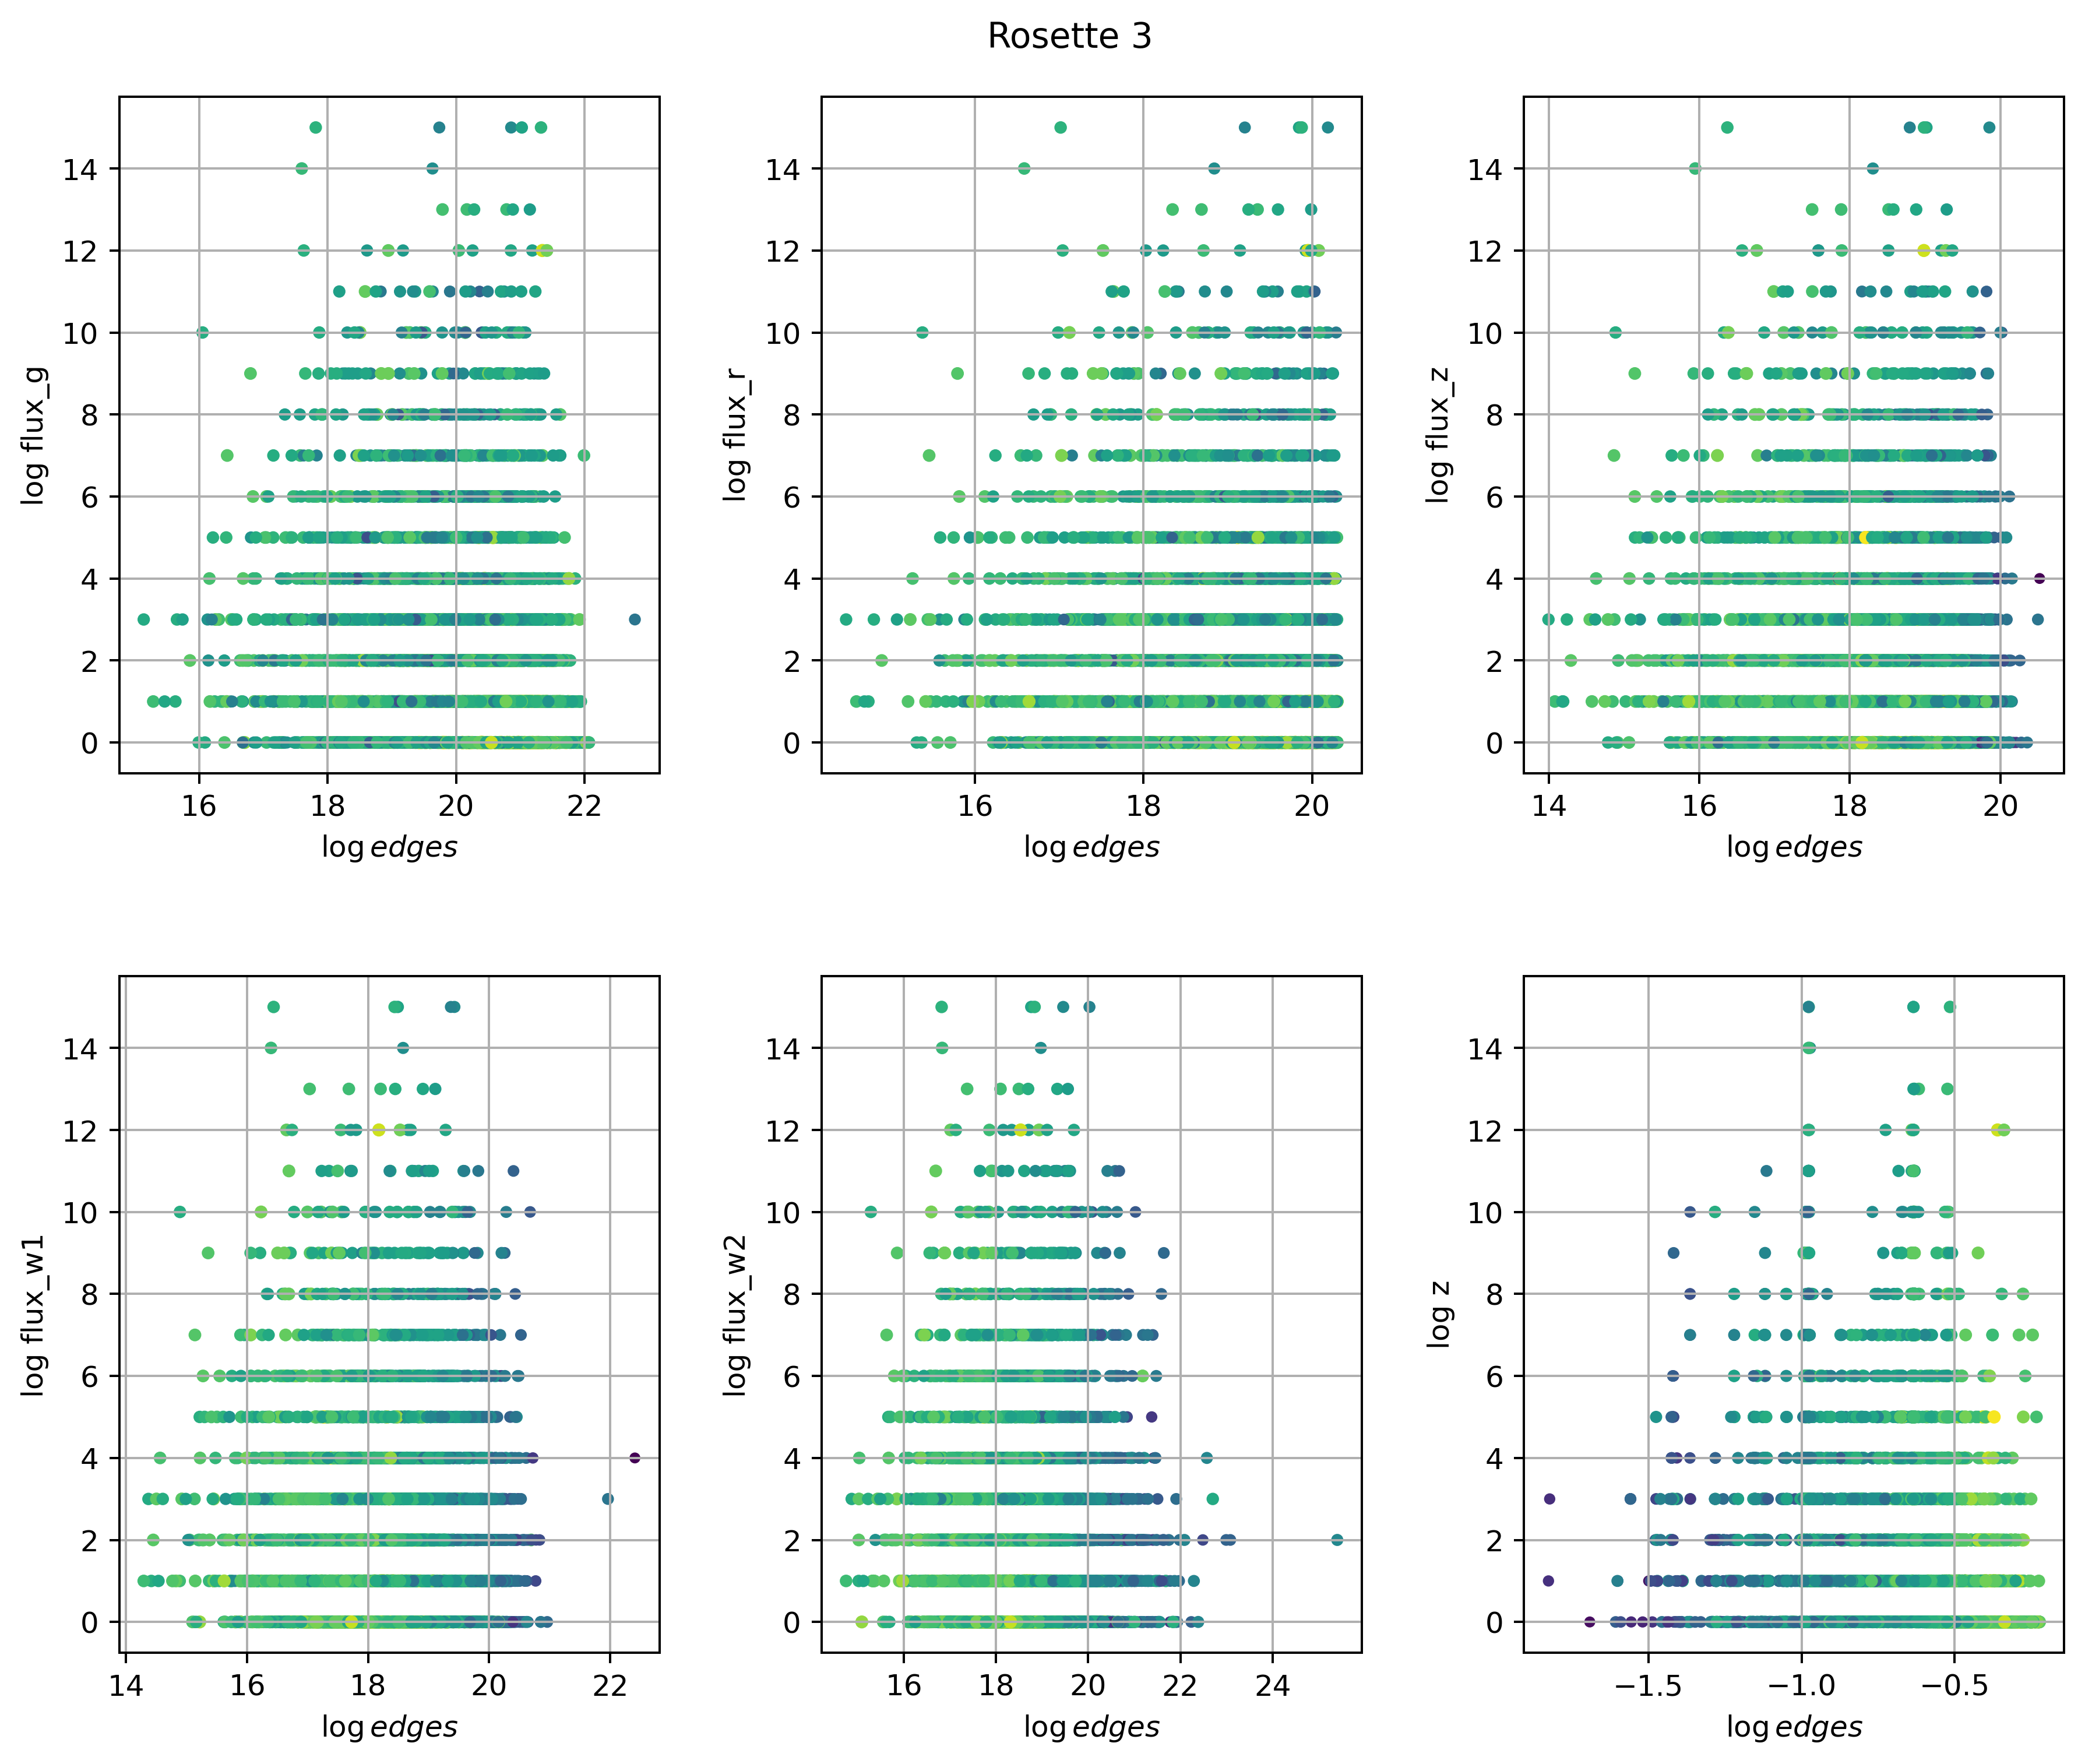

In [19]:
c = defaultdict(int)
for edge in edges:
    c[edge[0]] += 1
    c[edge[1]] += 1
ed = [c[n[0]] for n in nodes]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
plt.tight_layout()
plt.suptitle(r'Rosette 3', y=1.02)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i in range(2):
    for j in range(3):
        axes[i, j].scatter(flux[:,i*3+j], ed, c=cmap(n), s=m)
        axes[i, j].set_xlabel(r'$\log edges$')
        axes[i, j].set_ylabel(f'log {props[i*3+j]}')
        axes[i, j].grid()